In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import csv

In [4]:
# Import dataset from Excel to Python
# Product A
df_a = pd.read_excel('/Users/melaniecheung/Desktop/Python_Projects/Liquid/Grad_Dataset.xlsx', sheet_name='product_A')
# Product B
df_b = pd.read_excel('/Users/melaniecheung/Desktop/Python_Projects/Liquid/Grad_Dataset.xlsx', sheet_name='product_B')

In [5]:
df_a.head()

,date,vols_20,Return
0,2018-08-21,0.105495,0.005600
1,2018-08-22,0.111932,0.002638
2,2018-08-23,0.110349,-0.000877
3,2018-08-24,0.107680,0.003218
4,2018-08-27,0.104130,0.008166


In [6]:
df_b.head()

,date,vols_20,Return
0,2018-08-21,0.122147,0.003974
1,2018-08-22,0.123376,0.000404
2,2018-08-23,0.124515,-0.001494
3,2018-08-24,0.118907,0.002183
4,2018-08-27,0.114241,0.011983


In [8]:
df_a['date'] = pd.to_datetime(df_a['date'], format='%Y-%m-%d')
df_b['date'] = pd.to_datetime(df_b['date'], format='%Y-%m-%d')

### 1. Calculate realized volatility over appropriate time periods for Product A and Product B.

Realized Volatility is the square root of the aggregated sum (over a period of time) of the squared
return values. In the following tables of Product A and B, I have added extra columns of ‘Variance’,
which is the squared value of return, ‘Realized Variance’ the aggregated sum of ‘Variance’ of the
past 20 days, and ‘Realized Volatility’, which is the square root of ‘Realized Variance’. I have chosen
the time frame for the Realized Volatility to be 20 days, as the Implied Volatility in the data set is
calculated over a 20 day period.

In [9]:
# Product A
df_a['Variance (%)'] = df_a['Return']**2
df_a['Realized Variance'] = df_a['Variance (%)'].rolling(20).sum()
df_a['Realized Volatility'] = df_a['Realized Variance']**(1/2)

In [10]:
df_a

,date,vols_20,Return,Variance (%),Realized Variance,Realized Volatility
0,2018-08-21,0.105495,0.005600,3.135736e-05,NaN,NaN
1,2018-08-22,0.111932,0.002638,6.957720e-06,NaN,NaN
2,2018-08-23,0.110349,-0.000877,7.690177e-07,NaN,NaN
3,2018-08-24,0.107680,0.003218,1.035717e-05,NaN,NaN
4,2018-08-27,0.104130,0.008166,6.667777e-05,NaN,NaN
...,...,...,...,...,...,...
493,2020-08-10,0.199881,0.003317,1.100150e-05,0.002600,0.050995
494,2020-08-11,0.191372,0.022491,5.058405e-04,0.002970,0.054498
495,2020-08-13,0.186696,0.005423,2.940814e-05,0.002539,0.050393
496,2020-08-14,0.205489,-0.011951,1.428351e-04,0.002656,0.051539


Here are the values of the calculated ‘Realized Volatility’ for Product A. The first 20 rows are
empty, as there is not sufficient days available to be aggregated into our 20 day time frame.

In [12]:
df_a['Realized Volatility']

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
493    0.050995
494    0.054498
495    0.050393
496    0.051539
497    0.052180
Name: Realized Volatility, Length: 498, dtype: float64

In [13]:
# Product B
df_b['Variance (%)'] = df_b['Return']**2
df_b['Realized Variance'] = df_b['Variance (%)'].rolling(20).sum()
df_b['Realized Volatility'] = df_b['Realized Variance']**(1/2)

Here are the values of the calculated ‘Realized Volatility’ for Product B.

In [14]:
 df_b['Realized Volatility']

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
492    0.061348
493    0.058111
494    0.058051
495    0.058589
496    0.057817
Name: Realized Volatility, Length: 497, dtype: float64

### 2. Present graphically implied and realized volatility for both Product A and Product B.

Text(0, 0.5, 'Volatility')

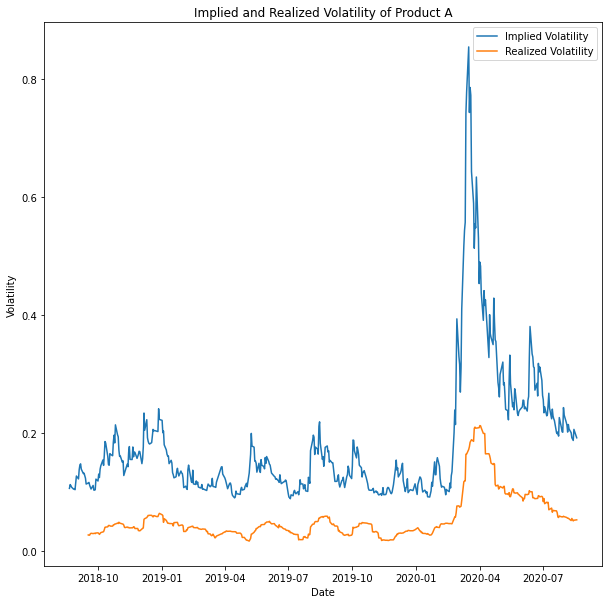

In [15]:
g = plt.figure(figsize=(10,10))
sns.lineplot(data=df_a, x="date", y="vols_20", label='Implied Volatility')
sns.lineplot(data=df_a, x="date", y="Realized Volatility", label='Realized Volatility')
plt.title('Implied and Realized Volatility of Product A')
plt.xlabel('Date')
plt.ylabel('Volatility')

Text(0, 0.5, 'Volatility')

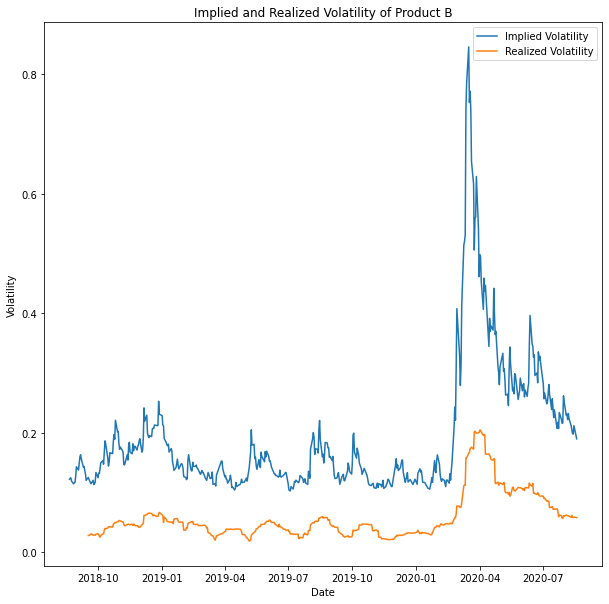

In [16]:
g = plt.figure(figsize=(10,10))
sns.lineplot(data=df_b, x="date", y="vols_20", label='Implied Volatility')
sns.lineplot(data=df_b, x="date", y="Realized Volatility", label='Realized Volatility')
plt.title('Implied and Realized Volatility of Product B')
plt.xlabel('Date')
plt.ylabel('Volatility')

### 3. Investigate correlation between implied volatility of Product A and Product B. How does the relationship change over time?

In [17]:
diff_a = df_a['vols_20']
diff_b = df_b['vols_20']
df_diff = pd.concat([df_a['date'], diff_a, diff_b], axis='columns')
df_diff.columns=['Date', 'Product A', 'Product B']
df_diff

,Date,Product A,Product B
0,2018-08-21,0.105495,0.122147
1,2018-08-22,0.111932,0.123376
2,2018-08-23,0.110349,0.124515
3,2018-08-24,0.107680,0.118907
4,2018-08-27,0.104130,0.114241
...,...,...,...
493,2020-08-10,0.199881,0.198135
494,2020-08-11,0.191372,0.197624
495,2020-08-13,0.186696,0.211616
496,2020-08-14,0.205489,0.189664


Text(0, 0.5, 'Difference in Volatility')

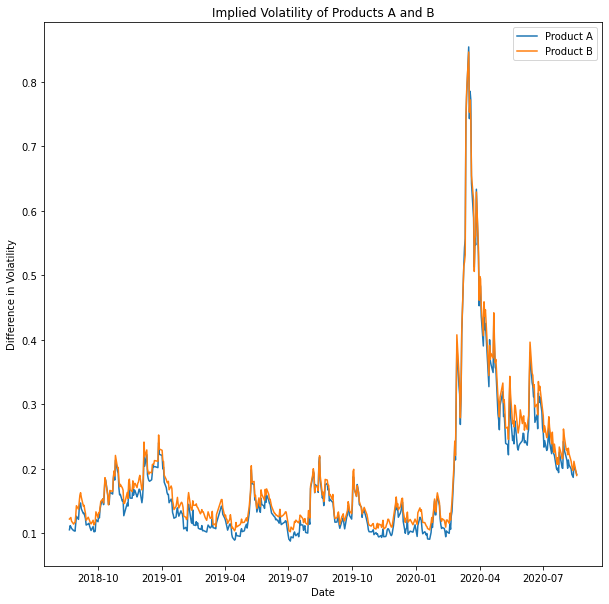

In [18]:
 g = plt.figure(figsize=(10,10))
sns.lineplot(data=df_a, x="date", y="vols_20", label='Product A')
sns.lineplot(data=df_b, x="date", y="vols_20", label='Product B')
plt.title('Implied Volatility of Products A and B')
plt.xlabel('Date')
plt.ylabel('Difference in Volatility')

Text(0, 0.5, 'Product B')

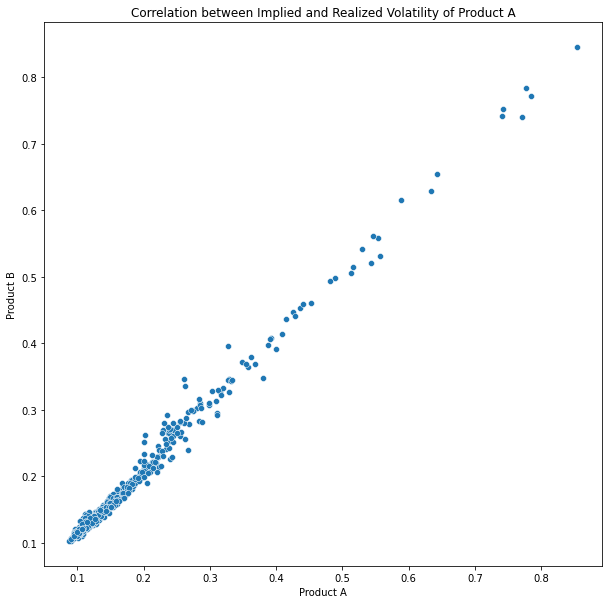

In [19]:
g = plt.figure(figsize=(10,10))
sns.scatterplot(data=df_diff, x="Product A", y="Product B")
plt.title('Correlation between Implied and Realized Volatility of Product A')
plt.xlabel('Product A')
plt.ylabel('Product B')

In [21]:
df_diff['Product A'].corr(df_diff['Product B'])

0.9953062205975581

As shown by the scatter plot above, the Implied Volatility of both Products A and B are highly
correlated throughout the entire timeframe. The correlation score between Product A and Product
B is 99.5%, which is extremely high. In the line plot, both products see similar directions and
magnitude of movement over time. When Product A volatility saw an increase or decrease, so did
Product B. Before March 2020, their volatility was relatively stable and remained below 0.2 for the
majority of the time. They have reached their lowest point together at 0.1, and their highest point
at almost 0.9. It is worth noting that the volatility of Product B is slightly higher than that of
Product A before March 2020. However, as both products see a downward trend and a significant
reduction in their volatility after reaching their peak in March 2020, they are more similar in levels
for the time being.